# Машинное обучение без учителя

# Домашние задания

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## 1

### 1.1 сгенерировать 500 точек с помощью метода make_blobs;

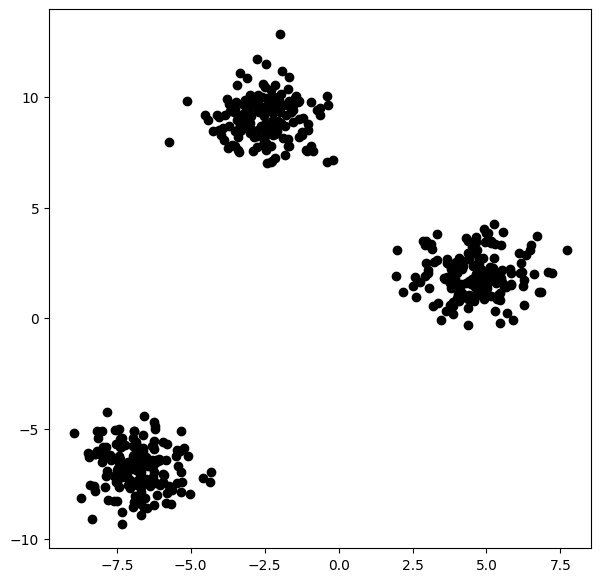

In [ ]:
from sklearn.datasets import make_blobs

X, _ = make_blobs(n_samples=500, random_state=42)

plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c="black")
plt.show()

### 1.2 сгенерировать 450 точек с помощью метода make_circles, умножить координаты точек на 10;

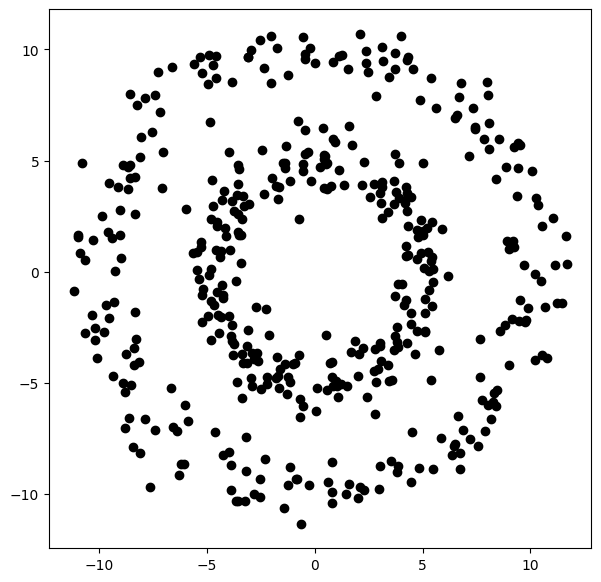

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=450, factor=.5, noise=.08)
X = X * 10
plt.figure(figsize=(7, 7))
plt.scatter(X[:, 0], X[:, 1], c="black")
plt.show()

### 1.3. отобразить на одном рисунке первые 500 точек красным цветом, а вторые 450  - зеленым.

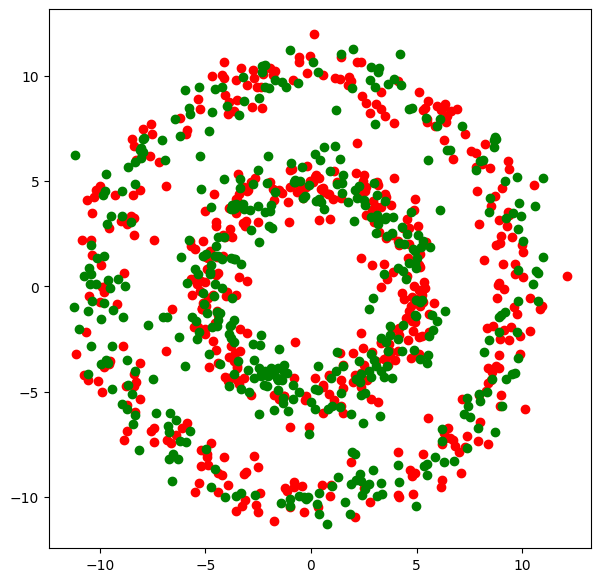

In [ ]:
from sklearn.datasets import make_circles

X, _ = make_circles(n_samples=950, factor=.5, noise=.08)
X = X * 10
plt.figure(figsize=(7, 7))
plt.scatter(X[:500, 0], X[:500, 1], c="red")
plt.scatter(X[500:, 0], X[500:, 1], c="green")
plt.show()

## 2

### 2.1. Вывести результат работы алгоритма PCA для датасета digits.

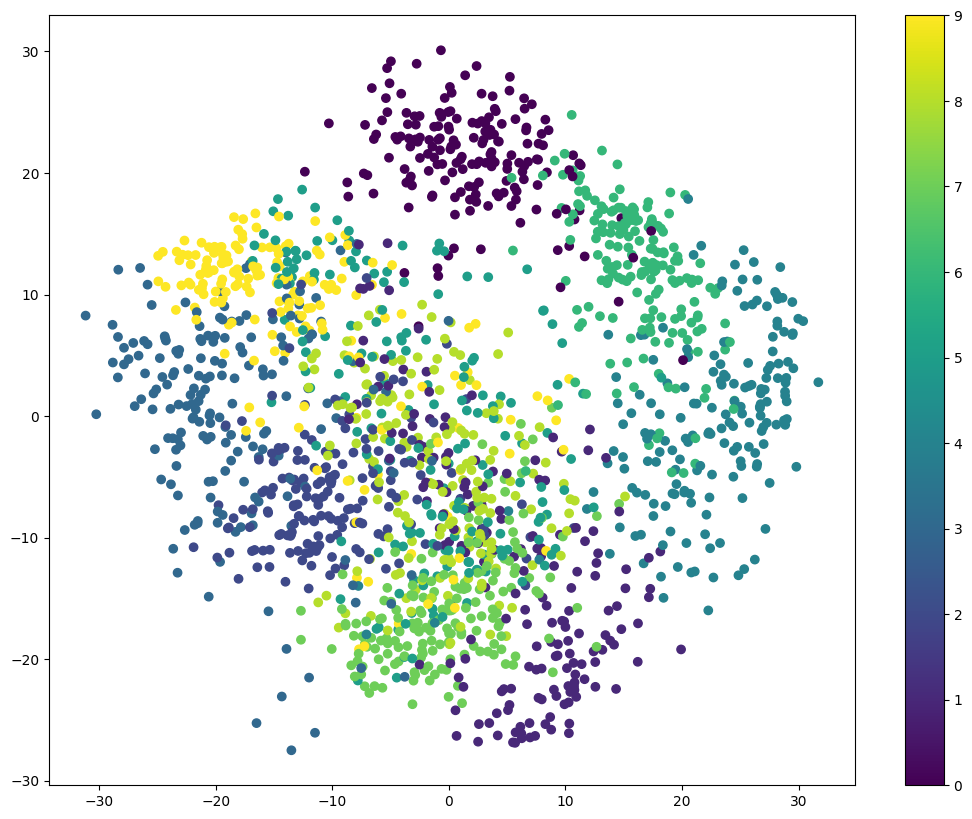

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits()
#print(iris)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize=(13, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

### 2.2. Вывести результат работы алгоритма t-SNE для датасета digits.


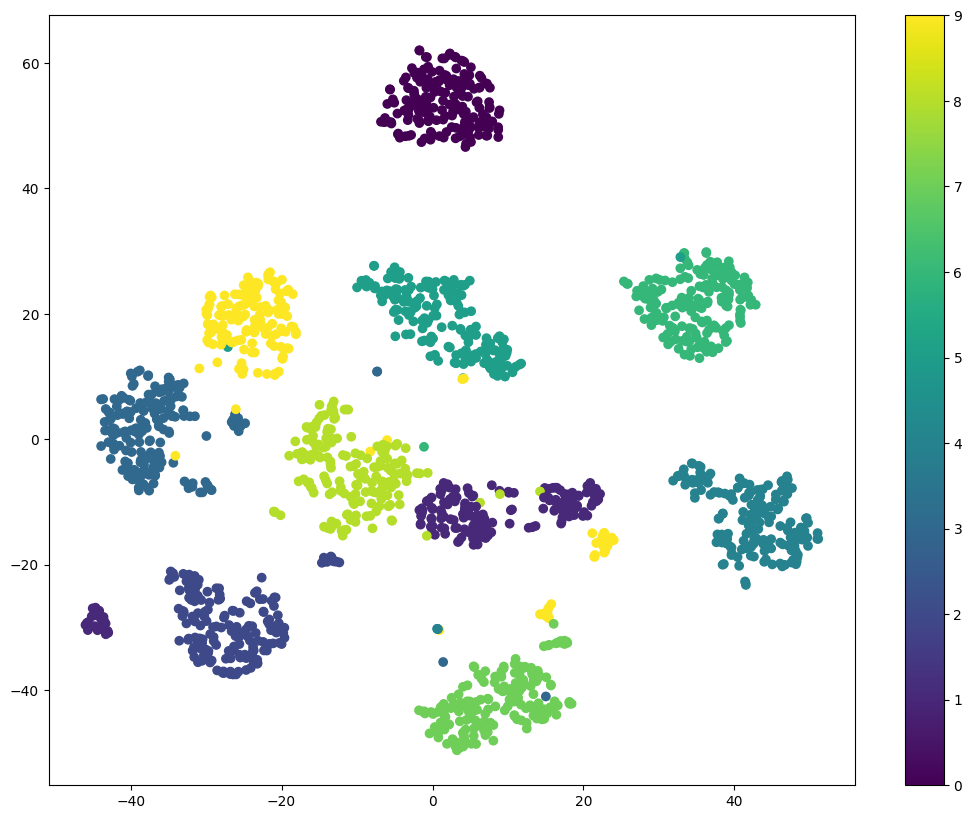

In [10]:
from sklearn.datasets import load_digits

digits = load_digits()

from sklearn.manifold import TSNE

tsne = TSNE(n_components=2)
X = tsne.fit_transform(digits['data'])
y = digits['target']

plt.figure(figsize=(13, 10))
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.colorbar()
plt.show()

## 3 Суперпиксельная сегментация изображения

Дано:
- изображение (формат jpg/png)
- количество кластеров N (>50)
- задан нормировочный коэффициент k

Требуется:
- каждый пиксель представить в виде объекта с набором признаков $\{R, G, B, k*X, k*Y\}$ (где R – количество красного цвета, G – зеленого, B – синего, X - номер столбца, Y - номер строки)
- провести кластеризацию пикселей методом kmeans
- заменить в исходном изображении цвет каждого пикселя на цвет центра кластера, которому принадлежит пиксель
- повторить кластеризацию для разных значений коэффициента k

Пример:

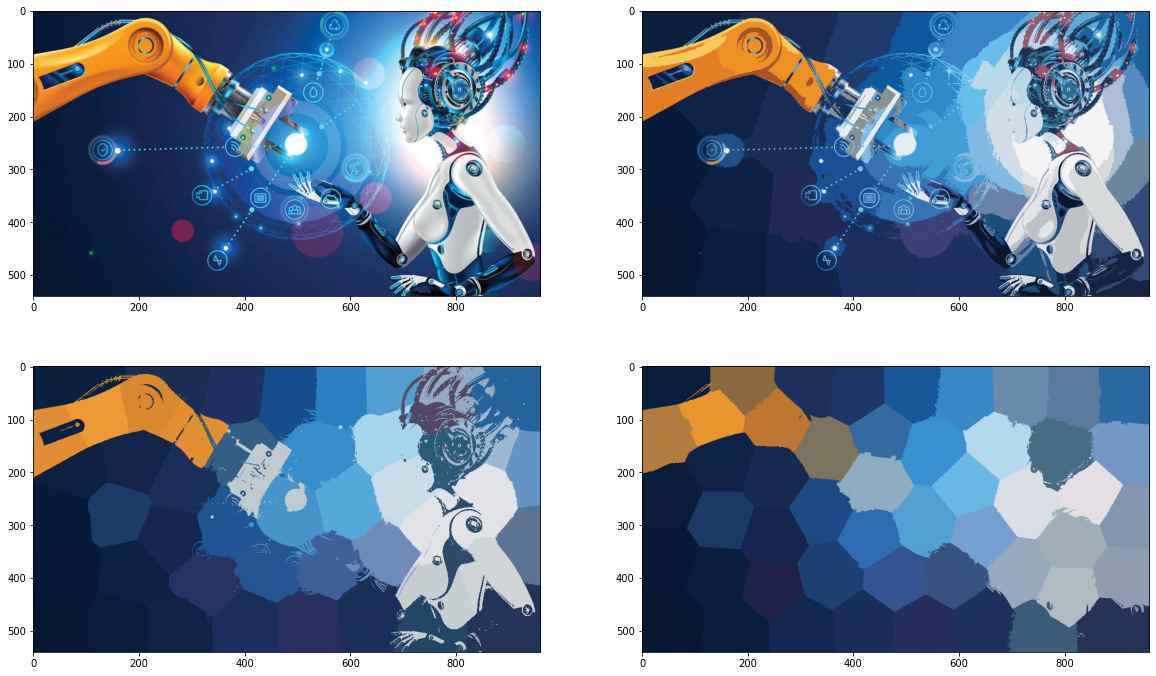

(540, 960, 3)
(518400, 5)


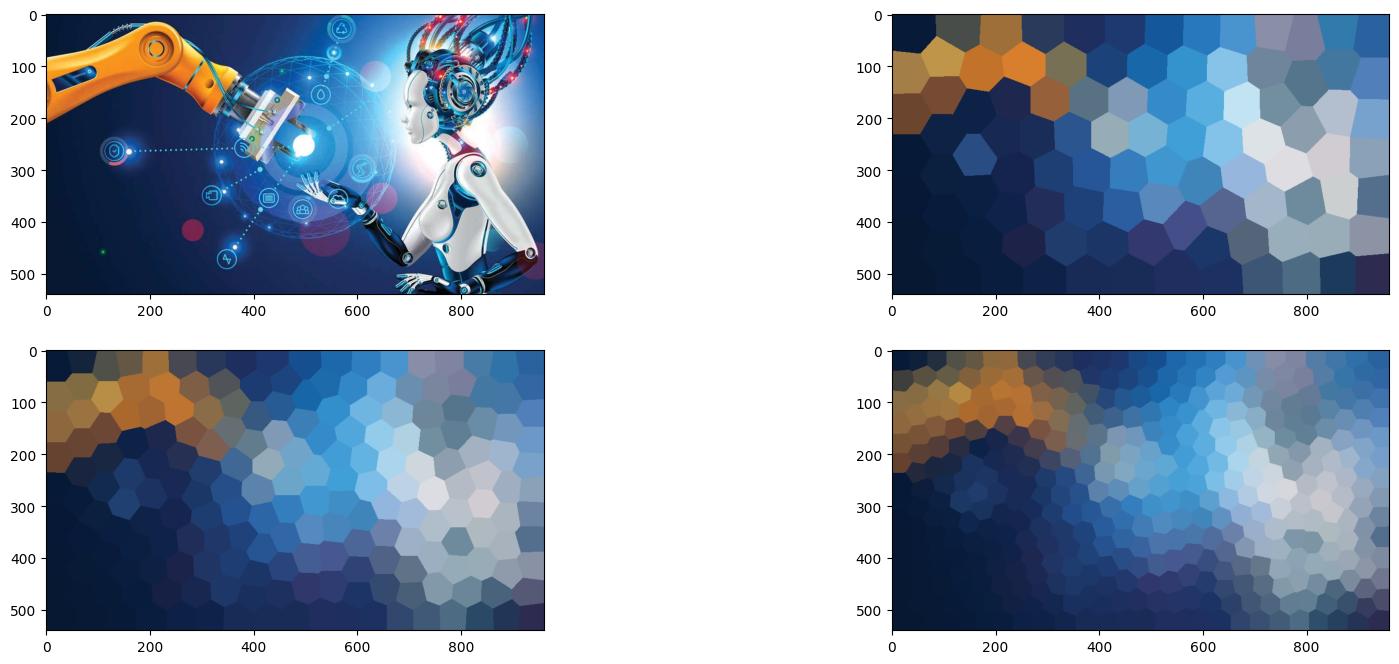

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

#from matplotlib.image import imread
from skimage.io import imread

url = 'https://d3rds0a9qm8vc5.cloudfront.net/s3-grok-cloodon-com/Artificial_intelligence_transforming_robotics.1663343276077.jpg'
orig_img = imread(url)
k = 80


def img_to_reshaped_arr(orig_img):
    dots_size = orig_img.shape[0] * orig_img.shape[1]
    print(orig_img.shape)
    reshaped_array = np.zeros((dots_size, 5))
    print(reshaped_array.shape)
    for ix, iy in np.ndindex(orig_img.shape[:2]):
        dots_size -= 1
        reshaped_array[dots_size] = np.array((orig_img[ix, iy, 0], orig_img[ix, iy, 1], orig_img[ix, iy, 2], ix * k, iy * k))
    return reshaped_array


reshaped = img_to_reshaped_arr(orig_img)

def clasterize_and_refill(n_clusters, X):
    kmeans = KMeans(n_clusters=n_clusters).fit(X)
    labels = kmeans.labels_
    centers = kmeans.cluster_centers_
    for i in range(X.shape[0]):
        X[i, :3] = centers[labels[i], :3]
    return X


def back_to_img(X, orig_img):
    new_img = np.zeros(orig_img.shape, dtype=np.uint8)
    for i in np.ndindex(X.shape[0]):
        new_img[(X[i, 3] / k).astype(np.uint), (X[i, 4] / k).astype(np.uint)] = X[i, :3].astype(np.uint8)
    return new_img


plt.figure(figsize=(20, 8))
plt.subplot(2, 2, 1)
# plt.imshow(back_to_img(clasterize_and_refill(50, reshaped), orig_img))
plt.imshow(orig_img)
plt.subplot(2, 2, 2)
plt.imshow(back_to_img(clasterize_and_refill(100, reshaped), orig_img))
plt.subplot(2, 2, 3)
plt.imshow(back_to_img(clasterize_and_refill(200, reshaped), orig_img))
plt.subplot(2, 2, 4)
plt.imshow(back_to_img(clasterize_and_refill(400, reshaped), orig_img))
plt.show()

## 4

Построить модель линейной регрессии для данных из файла data.csv

https://drive.google.com/file/d/1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu/view?usp=sharing

Найти коэффициенты регрессии и построить график.



In [ ]:
# ячейка что бы скачать data.csv
!gdown '1MK4yFiHcsKST5sDkfpFCPDrgyVp_eCQu'

In [101]:

from sklearn.linear_model import LinearRegression
import csv

with open('data.csv', newline='') as f:
    reader = csv.reader(f)
    data = [row for row in reader][1:]
    data = np.array(list(map(lambda i: np.array(list(map(lambda j: int(j), i))), data)))

X = data[:, 0].reshape(-1, 1)
y = data[:, 1].reshape(-1, 1)
reg = LinearRegression().fit(X, y)

X_test = np.array([0, max(X)[0]])
y_test = reg.intercept_ + reg.coef_[0] * X_test

plt.figure()
plt.scatter(X, y, c='r')
plt.plot(X_test, y_test, c='black')
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: 'data.csv'

## 5

1. Разбить датасет digits на обучающую и тестовую выборку, 85% и 15% соответственно.
2. Найти лучший классификатор (и лучшие параметры) для этого набора данных.
3. Выведите в графическом виде все примеры, где лучший классификатор ошибся.
4. Сравнить результат с классификацией датасета digits, предобработанного алгоритмом t-SNE.

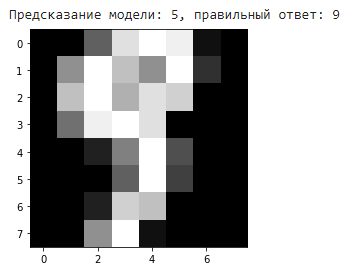

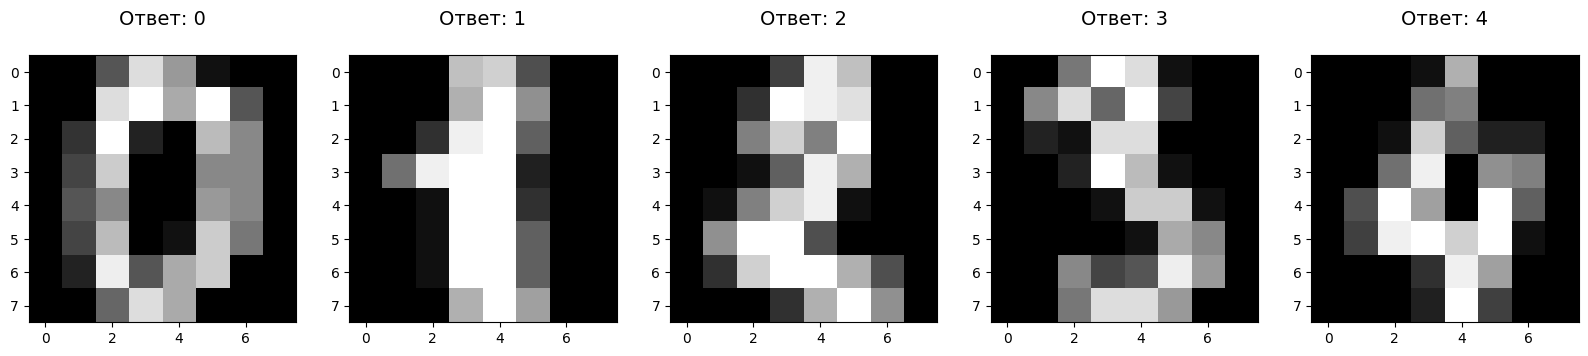

In [152]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

digits = load_digits()

X = digits.data
y = digits.target

plt.figure(figsize=(20, 4))
for index, (image, label) in enumerate(zip(X[0:5], y[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8, 8)), cmap=plt.cm.gray)
    plt.title('Ответ: %i\n' % label, fontsize=14)

In [153]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)
from sklearn.model_selection import GridSearchCV

пробуем knn

In [154]:
from sklearn.neighbors import KNeighborsClassifier

params = {
    "algorithm": ['auto' 'ball_tree', 'kd_tree', 'brute'],  # алгоритм, используемый для вычисления ближайших соседей.
    "weights": ['uniform', 'distance'],  # весовая функция, используемая в прогнозировании.
    "n_neighbors": [1, 3, 5, 7, 9, 11, 13, 15],  # количество соседей
    "p": [1, 2, 3],  # параметр мощности для метрики Минковского. При p = 2 - евклидова метрика
}

knn_model = KNeighborsClassifier()
knn_wrapped = GridSearchCV(
    knn_model,
    params,
    cv=3
)

knn_wrapped.fit(X_train, y_train)
print(knn_wrapped.best_params_)

{'algorithm': 'kd_tree', 'n_neighbors': 3, 'p': 2, 'weights': 'uniform'}


/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
144 fits failed out of a total of 432.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
144 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/sirosh/Doc

проверяем тестовые выборки на лучших найденых параметрах

In [155]:
knn_model = KNeighborsClassifier(**knn_wrapped.best_params_)
knn_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(knn_model.predict(X_test), y_test))

accuracy:  0.9814814814814815


пробуем дерево принятия решений

In [156]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "splitter": ["best", "random"],
    "max_features": [int, float, "sqrt", "log2"]
}

dt_model = DecisionTreeClassifier(criterion="entropy")
dt_wrapped = GridSearchCV(
    dt_model,
    params,
    cv=3
)

dt_wrapped.fit(X_train, y_train)
print(dt_wrapped.best_params_)

{'criterion': 'gini', 'max_features': 'sqrt', 'splitter': 'best'}


/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
36 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
18 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/home/sirosh/Docume

In [157]:
dt_model = DecisionTreeClassifier(**dt_wrapped.best_params_)
dt_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(dt_model.predict(X_test), y_test))

accuracy:  0.7777777777777778


пробуем случайный лес

In [158]:
from sklearn.ensemble import RandomForestClassifier

params = {
    "criterion": ["gini", "entropy", "log_loss"],
    "n_estimators": [100, 200, 300],
    "random_state": [10, 20, 30, 40, 50, 60, 70, 80]
}
rf_model = RandomForestClassifier()
rf_wrapped = GridSearchCV(
    rf_model,
    params,
    cv=3
)

rf_wrapped.fit(X_train, y_train)
print(rf_wrapped.best_params_)

{'criterion': 'entropy', 'n_estimators': 100, 'random_state': 70}


In [159]:
rf_model = RandomForestClassifier(**rf_wrapped.best_params_)
rf_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(rf_model.predict(X_test), y_test))

accuracy:  0.9666666666666667


пробуем логистическую регрессию

In [160]:
from sklearn.linear_model import LogisticRegression

params = {
    "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
    "penalty": ['l1', 'l2', 'elasticnet', None],
}
lr_model = LogisticRegression(random_state=0)
lr_wrapped = GridSearchCV(
    lr_model,
    params,
    cv=3
)

lr_wrapped.fit(X_train, y_train)
print(lr_wrapped.best_params_)

/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as sho

{'penalty': 'l2', 'solver': 'newton-cg'}


/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning: 
33 fits failed out of a total of 72.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "/home/sirosh/Documents/prog/python_projects/uni_python_setup/.venv/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_trai

In [161]:
lr_model = LogisticRegression(**lr_wrapped.best_params_)
lr_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(lr_model.predict(X_test), y_test))

accuracy:  0.9703703703703703


пробуем Байесовский наивный классификатор

In [162]:
from sklearn.naive_bayes import GaussianNB

params = {
    "var_smoothing": [1e-9, 1e-10, 1e-8]
}
gnb_model = GaussianNB()
gnb_wrapped = GridSearchCV(
    gnb_model,
    params,
    cv=3
)

gnb_wrapped.fit(X_train, y_train)
print(gnb_wrapped.best_params_)

{'var_smoothing': 1e-08}


In [163]:
gnb_model = GaussianNB(**gnb_wrapped.best_params_)
gnb_model.fit(X_train, y_train)

from sklearn.metrics import accuracy_score

print('accuracy: ', accuracy_score(gnb_model.predict(X_test), y_test))

accuracy:  0.8592592592592593


Лучше всего справился Случайный лес с параметрами `{'criterion': 'gini', 'n_estimators': 300, 'random_state': 70}` 

270


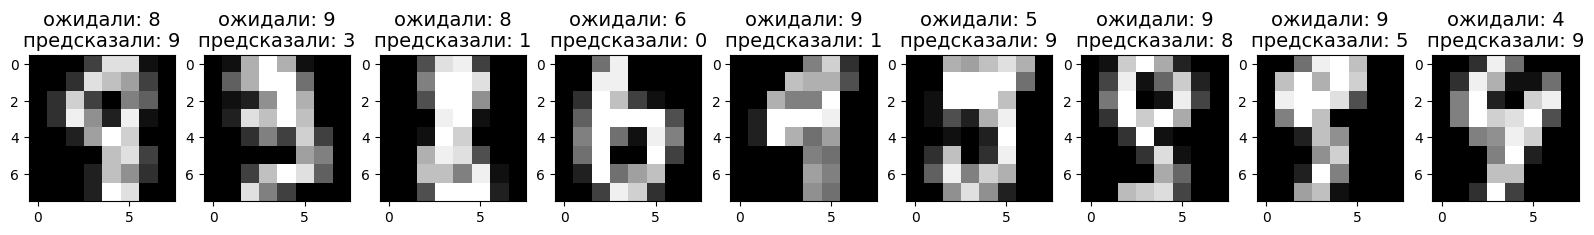

In [164]:
y_predictions = rf_model.predict(X_test)

plt.figure(figsize=(20, 4))
plt_i = 0
print(len(X_test))
size = len(list(filter(lambda i: i != 0, y_test - y_predictions)))
i_plt = 0
for index, (image, label, predicted) in enumerate(zip(X_test, y_test, y_predictions)):
    if label == predicted:
        continue
    i_plt += 1
    plt.subplot(1, size, i_plt)
    plt.imshow(np.reshape(image, (8, 8)), cmap="gray")
    plt.title(f'ожидали: {label}\nпредсказали: {predicted}', fontsize=14)

## 6

Подумайте, как с помощью кластеризации и классификации определить число на картинке:

# image.png

In [182]:
import base64
from sklearn.cluster import DBSCAN
from skimage.io import imread
from skimage.color import rgba2rgb, rgb2gray
import matplotlib.pyplot as plt
import numpy as np


# читаем изображение (не нашел способ как читать с прошолой ячейки)
def decode(base64_string):
    if isinstance(base64_string, bytes):
        base64_string = base64_string.decode("utf-8")

    imgdata = base64.b64decode(base64_string)
    img = imread(imgdata, plugin='imageio')
    return rgb2gray(rgba2rgb(img))
    # return img


img_matrix = decode(
    'iVBORw0KGgoAAAANSUhEUgAAABsAAAAUCAYAAAB8gkaAAAABT0lEQVRIie2UTyiDcRjHvy+rxWE5KOR10S6SKEcuclNOI7mtHOay2kEoh9UOK23RLtpFrVYrNAcHtYvmZHHRylGRi39JkmXFx4EceN+9Cy3KU0/96vn2fJ7v7/n1MyShGkVdrUD/sH/Yd2FuAYJ9y2rn4ITu4E2DUv5+RyB2Gd6BrY003Oct68NTEYbM13NdXwgAX6t9P3tYdwjIIc8YUKjU4D2PgPmBL8AugJF6od5gdbCWcQCaK2gsdza6fCgj7df2k6Tyo6Sy4y6K5+vKBrp07aD7MEEHAKvhGWKxReKZXeCSeCKKaTPxZgkestOO7i2cPSuaWNJtkymX4WhImSs0UlhQoy/pqDXk9Ov3BEXRL8P4/KwDmTMlJ9s1F5xVi9eU292gk3xK8bU9y1Yux3FuDpSKlCxLx7kVLZ561OY1VcUlVOHsB+M3fVd/GPYCVR7Z9bn+APIAAAAASUVORK5CYII=')

# преобразуем изображение для дальнейшоего разделения
(height, width) = img_matrix.shape
img_dots = []
for i in range(height):
    for j in range(width):
        if img_matrix[i][j] == 0:
            continue
        img_dots.append(np.array([i, j]))
img_dots = np.array(img_dots)

# находим с помощью dbscan кластеры - цифры
labels = DBSCAN(eps=1, min_samples=3).fit_predict(img_dots)
# по результатам dbscan разбиваем на отдельные цифры (grouped - координаты начала и конца по обоим осям, для каждего кластера)
# в этой части находим границы наших квадратов по результатам dbscan
grouped = dict()
for i, l in enumerate(labels):
    if l not in grouped:
        grouped[l] = (img_dots[i][0], img_dots[i][0], img_dots[i][1], img_dots[i][1])
    else:
        grouped[l] = (
            max(grouped[l][0], img_dots[i][0]),
            min(grouped[l][1], img_dots[i][0]),
            max(grouped[l][2], img_dots[i][1]),
            min(grouped[l][3], img_dots[i][1]))

# разбиваем непосредственно на несколько изображений
img_parts = []
img_matrix -= -1
for i, r in grouped.items():
    img_parts.append(
        np.lib.pad(img_matrix[r[1]:r[0], r[3]:r[2]], ((0, 0), (8 - r[0] + r[1], 8 - r[2] + r[3])), constant_values=1))

# с помощью классификации по отдельности определяем каждую цифру (здесь пробывал разные, хорошего резултьтата не добился : / )
img_parts = np.reshape(img_parts, (2, -1))
print(lr_model.predict(img_parts))

[4 8]
